In [5]:
import numpy as np
import math
from scipy.fft import fft, ifft
import scipy.signal as signal

import matplotlib.pyplot as plt


#### Nome: Diogo José Costa Alves N° USP: 13709881

### Exercício 5.5

**(a) Faça um jupyter notebook que plote a janela Gaussiana definida na equação (5.13), com $N = 1000$, $m = 100$, $M = 49$, $C = 1$ e $\alpha = 5$. Compute e plote a magnitude da DFT dessa janela.**

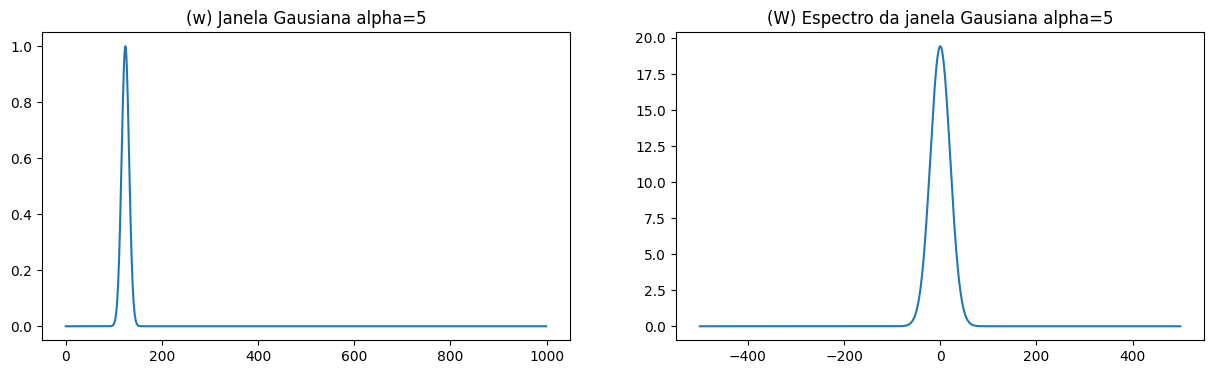

In [25]:
N = 1000
m = 100
M = 49
C = 1
alpha = 5

def janela_gausiana(N, m, M, C, alpha):
    w = np.zeros(N)

    constante1 = (m + (M-1)/2)
    denominador = 0.5 * M
    
    for j in range(N):
        t = (j - constante1)/denominador
        w[j] = C * np.exp(-alpha*t**2)
    return w

def plot_janela_gausiana(N, m, M, C, alpha):
    w = janela_gausiana(N, m, M, C, alpha)

    fig, axes = plt.subplots(1, 2, figsize=(15,4));

    axes[0].plot(w)
    axes[0].set_title(f"(w) Janela Gausiana alpha={alpha}")

    axes[1].plot( range(-N//2, N//2), np.roll(abs(fft(w)), N//2 ))
    axes[1].set_title(f"(W) Espectro da janela Gausiana alpha={alpha}")

    plt.show()
    
plot_janela_gausiana(N, m, M, C, alpha)

---- 
**(b) Repita a construção utilizando outros valores de $\alpha$, a ﬁm de veriﬁcar que, quando $\alpha$ cresce, a janela $w$ ﬁca mais estreita e a DFT $W$ ﬁca mais larga, e vice-versa.**

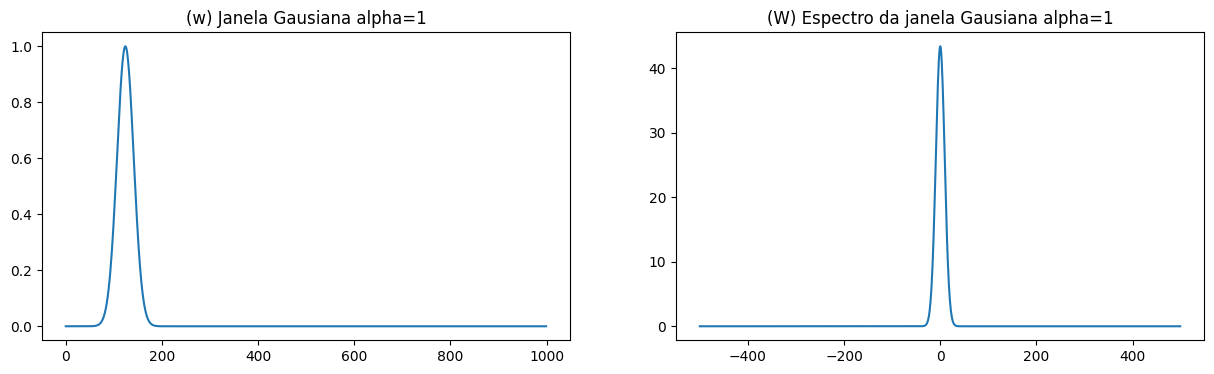

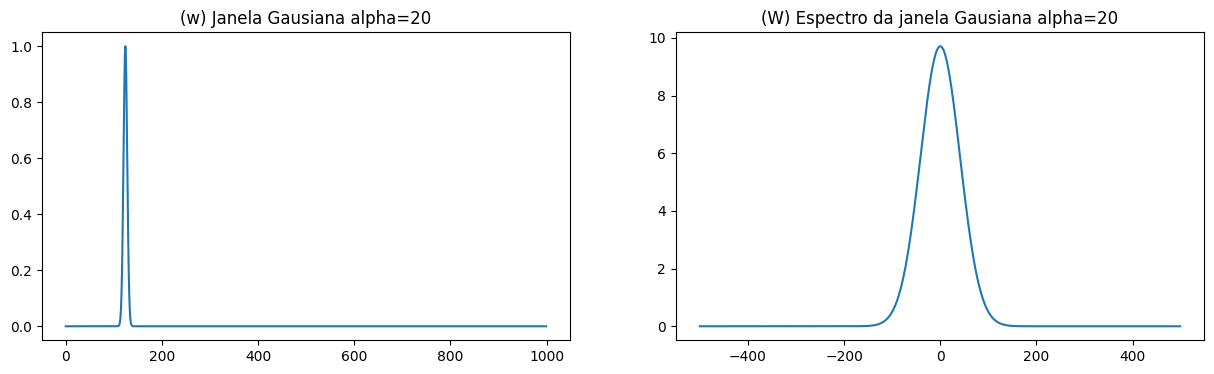

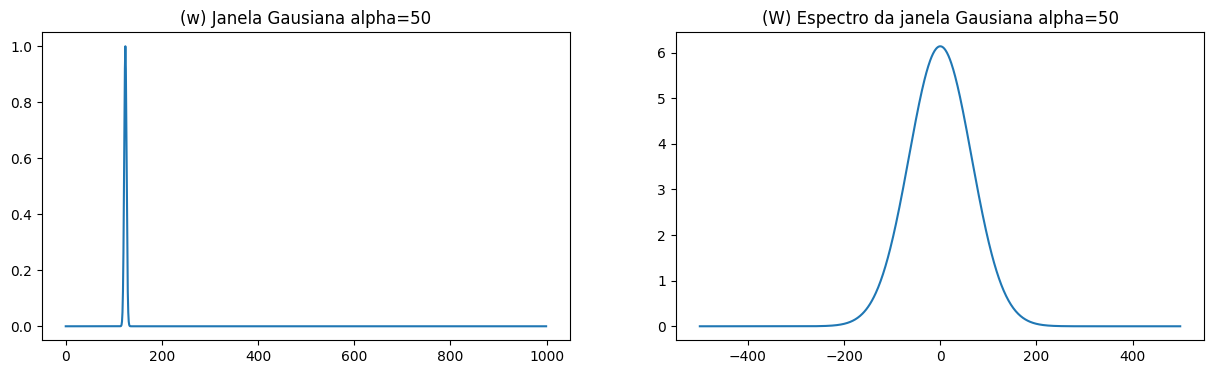

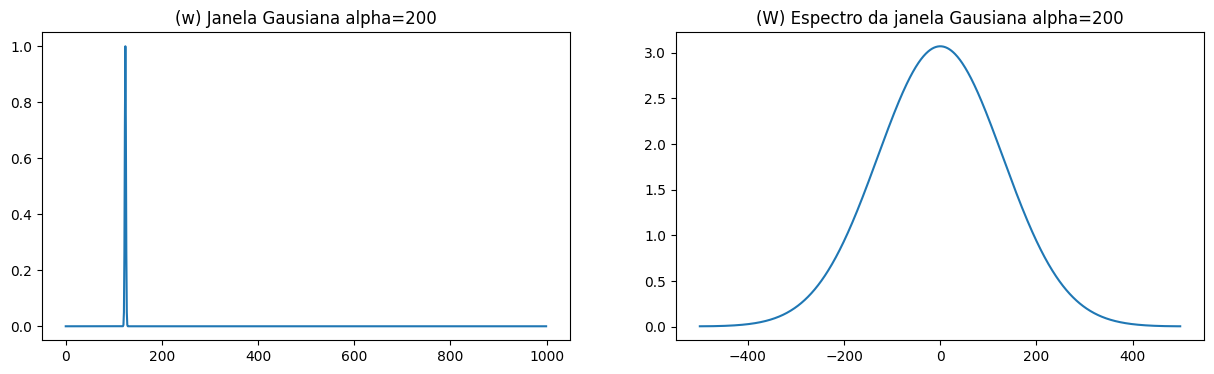

In [24]:
alphas = [1,20,50,200]
for alpha in alphas:
    plot_janela_gausiana(N, m, M, C, alpha)

---- 
**(c) Plote a janela de Hamming definida na equação (5.14), com $N = 1000$, $m = 100$ e $M = 49$. Varie o parâmetro $M$ e comente suas observações sobre o efeito na janela e em sua DFT.** 

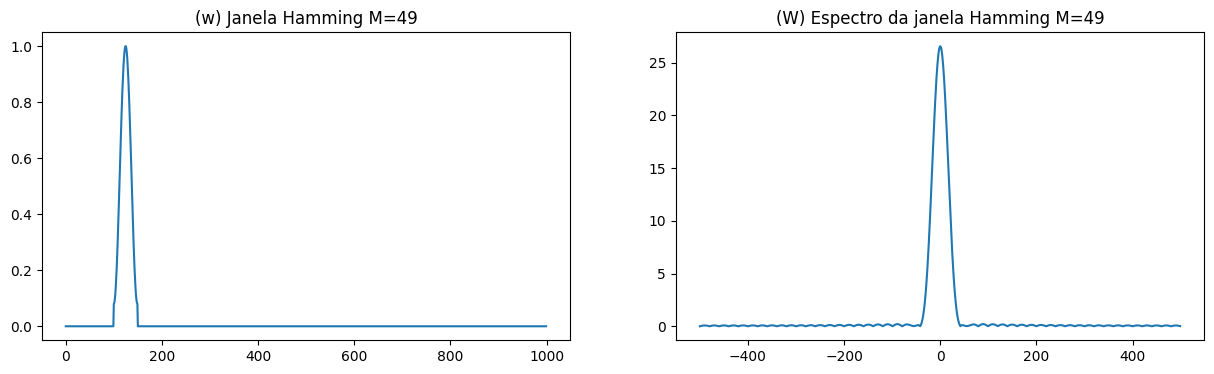

In [32]:
N = 1000
m = 100
M = 49


def janela_hamming(N, m, M):
    w = np.zeros(N)

    for j in range(m,m+M+1):
        t = (j-m)/M
        w[j] = 0.54 - 0.46*np.cos(2*math.pi*t)
    return w

    
def plot_janela_hamming(N, m, M):
    w = janela_hamming(N, m, M)

    fig, axes = plt.subplots(1, 2, figsize=(15,4));

    axes[0].plot(w)
    axes[0].set_title(f"(w) Janela Hamming M={M}")

    axes[1].plot( range(-N//2, N//2), np.roll(abs(fft(w)), N//2 ))
    axes[1].set_title(f"(W) Espectro da janela Hamming M={M}")

    plt.show()
    
plot_janela_hamming(N, m, M)

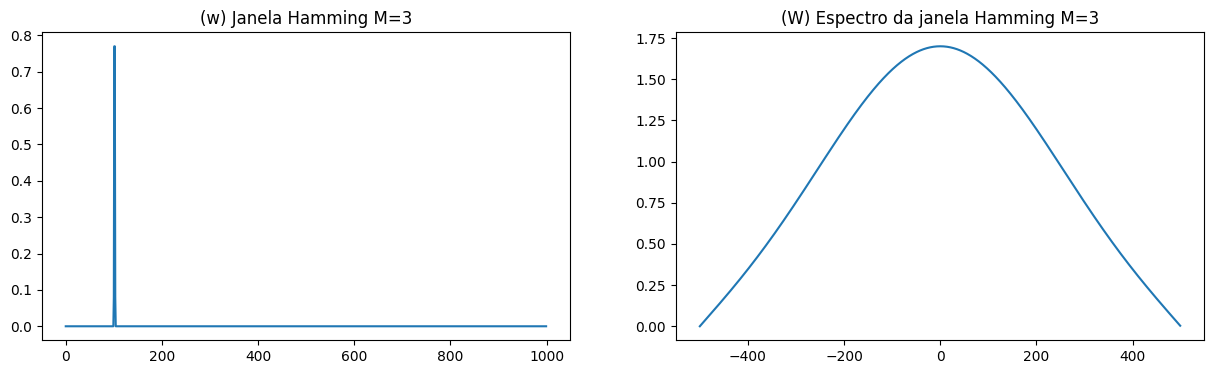

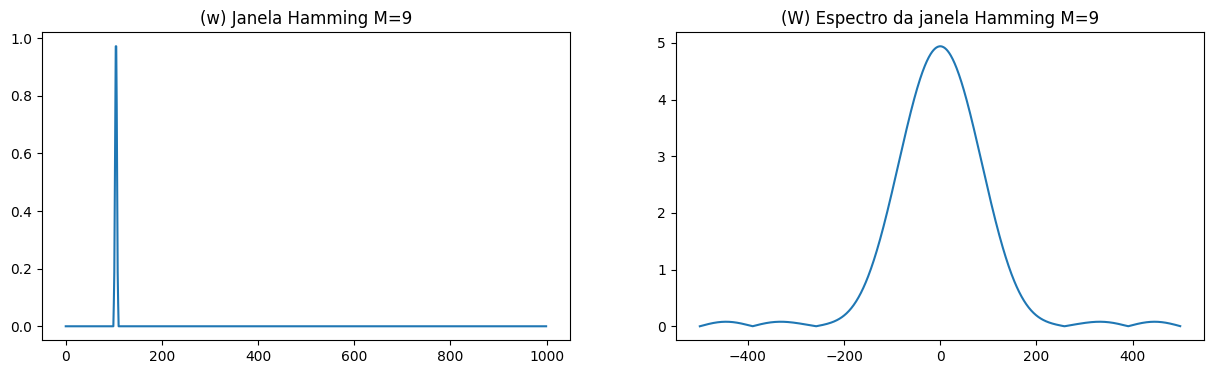

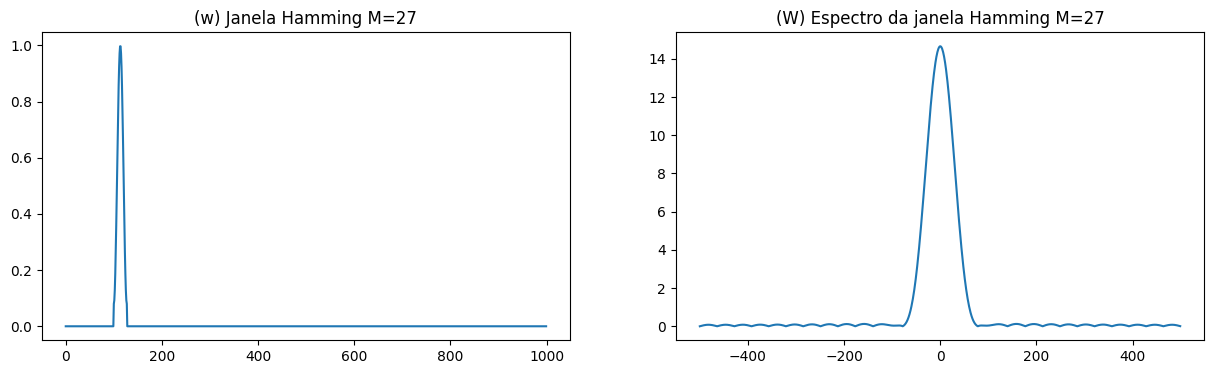

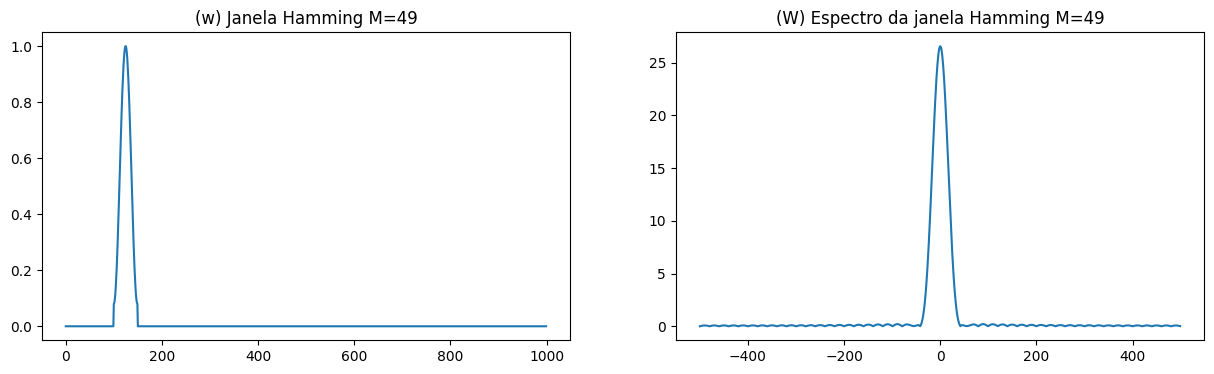

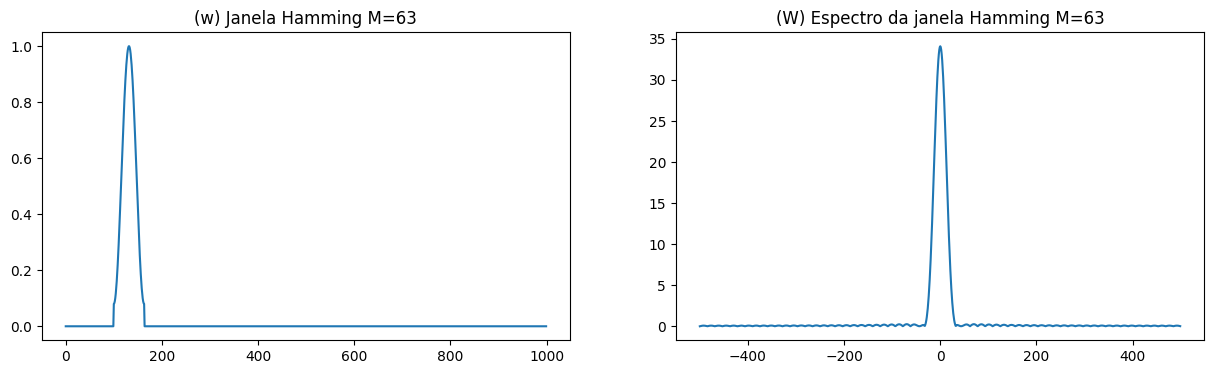

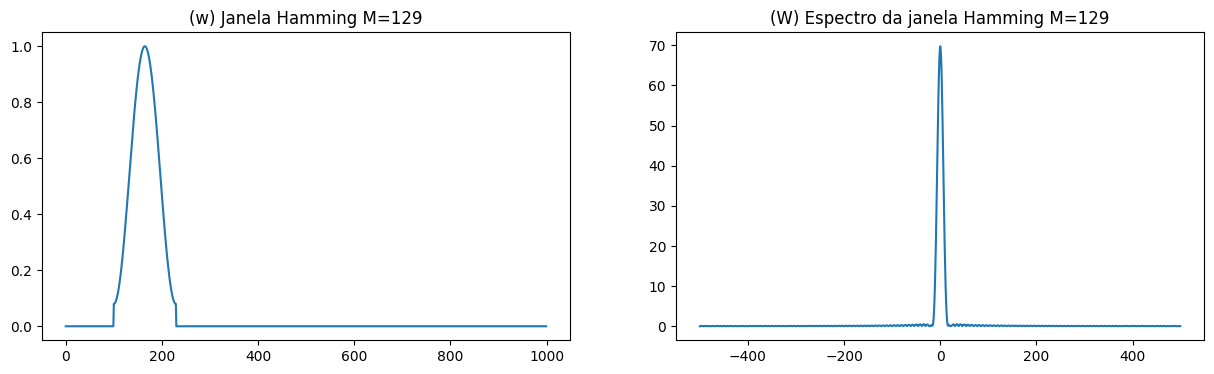

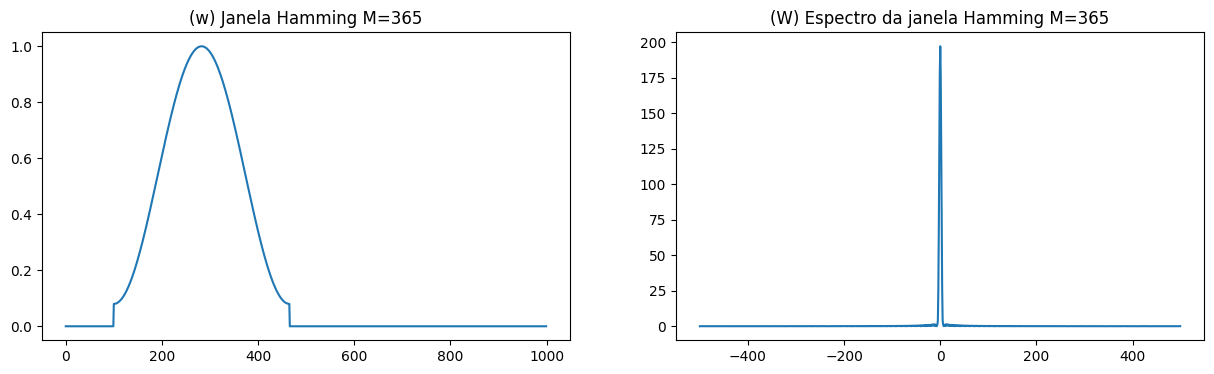

In [33]:
Ms = [3,9,27,49,63,129,365]
for M in Ms:
    plot_janela_hamming(N, m, M)

**Comentários:**

Conforme aumentamos a largura da janela (M), percebemos a que o espectro da janela $W$ vai ficando mais centralizado, com maior energia concentrada no centro e com lóbolus secundários com menos energia.
Em outras palavras, conforme aumentamos a largura da janela (M), reduzimos o vazamento espectral da janela.